In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from pyuvdata import UVCal, UVData, utils
import os
import sys
import glob
import uvtools as uvt
from astropy.time import Time
from astropy.coordinates import EarthLocation, SkyCoord, AltAz, Angle
import pandas
import warnings 
import copy
import utils
import hera_qm
from hera_mc import cm_hookup
warnings.filterwarnings('ignore')

could not import sklearn


In [2]:
# get data location
#data_path = os.environ['DATA_PATH']
#JD = os.environ['JULIANDATE']
data_path = '/lustre/aoc/projects/hera/lberkhou/2458845/'
JD = '2458845'
jd = 2458845

In [3]:
# Load in data
HHfiles, difffiles, uvdx, uvdy, uvd1, uvd2 = utils.load_data(data_path,JD)

## Autocorrelations for a single file

This plot shows autocorrelations for one timestamp of each antenna that is active and each polarization

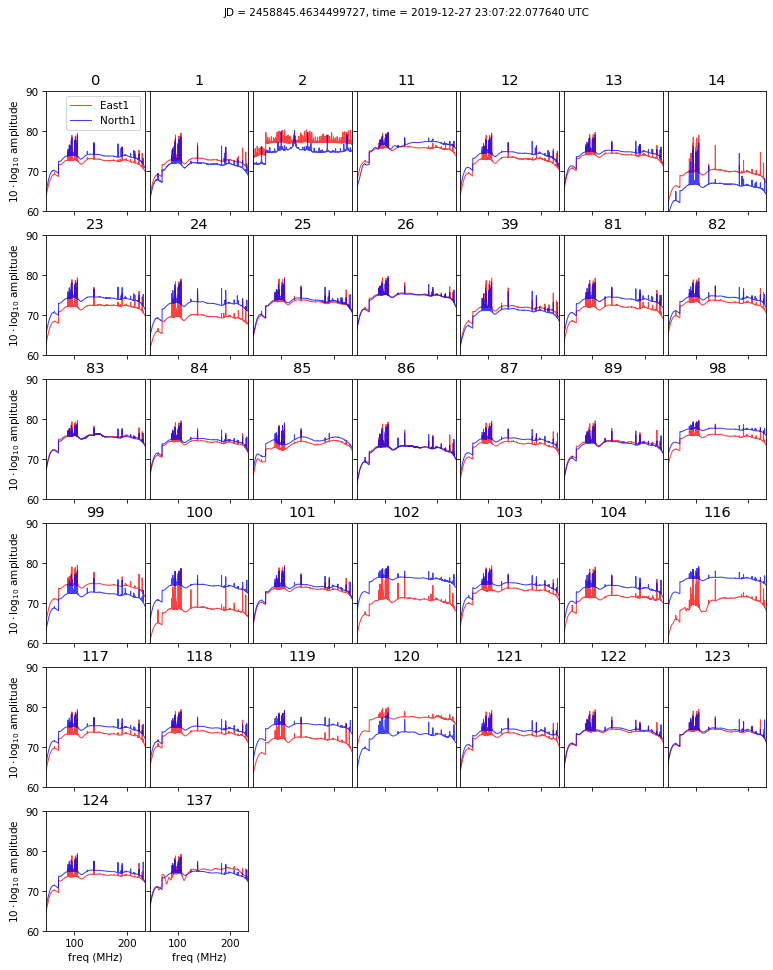

In [4]:
### plot autos
utils.plot_autos(uvdx, uvdy, uvd1, uvd2)

## Waterfalls of Autocorrelation Amplitudes for each Antenna and Each polarization

In [5]:
uvd = UVData()
uvd.read_uvh5(HHfiles, ant_str = 'autos')
lst0 = np.min(uvd1.lst_array) 
lst1 = np.max(uvd2.lst_array)

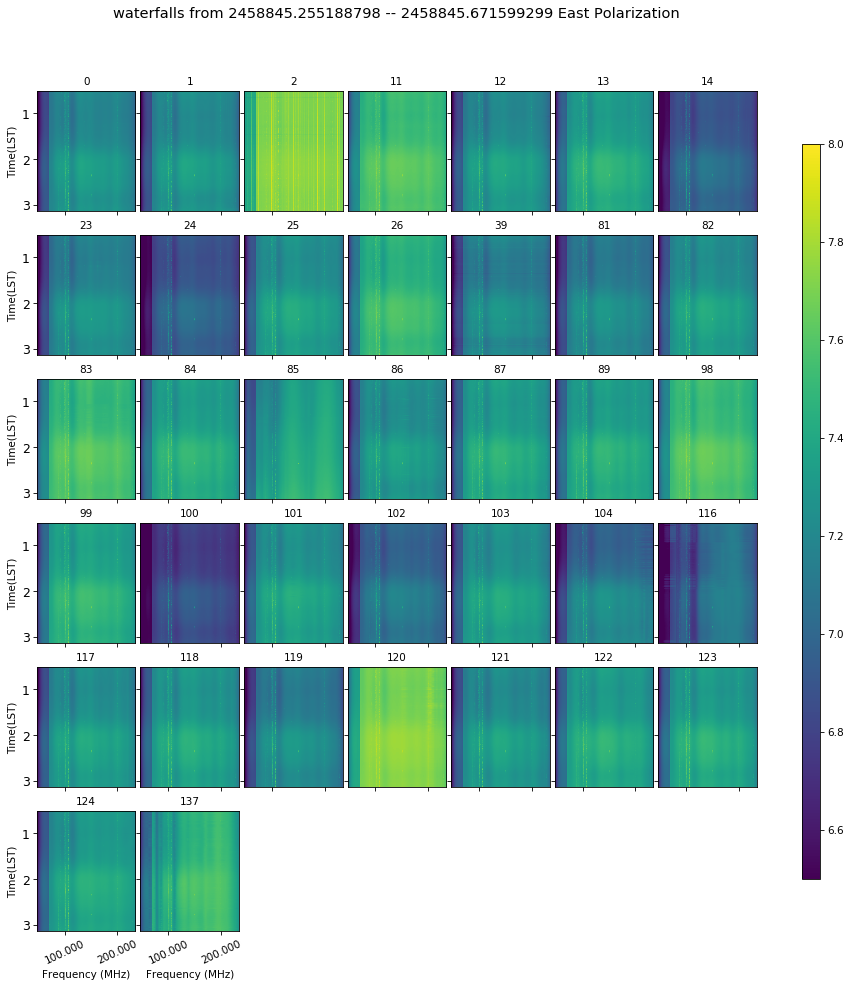

In [6]:
utils.plot_wfs(uvd, pol = 1)

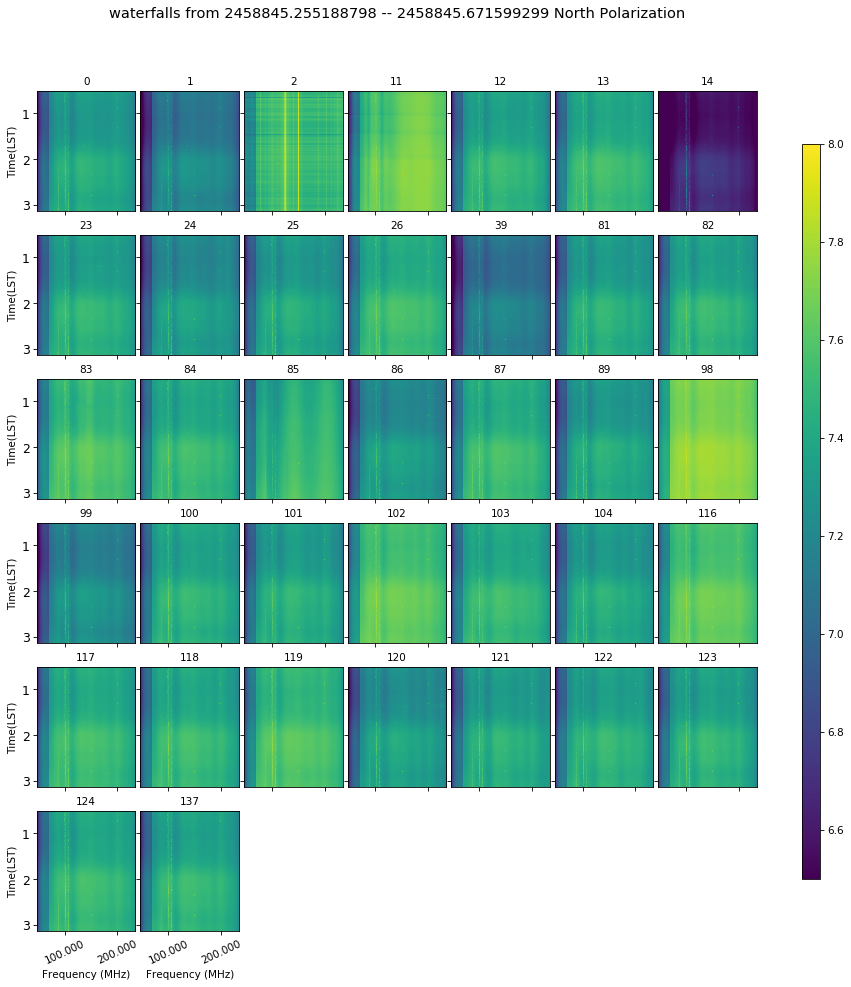

In [7]:
utils.plot_wfs(uvd, pol = 0)

## Correlation Metrics

The first plot shows the correlation metric (described below) for a set of baseline types, as calculated at several times throughout the night. It is expected that longer baselines (darker color) will exhibit lower values than the short baselines. 

The matrices show the phase correlation between antennas. Using the even and odd visibilities, each pixel is calculated as (even/abs(even)) * (conj(odd)/abs(odd)), and then averaged across time and frequency. If the phases are noise-like, this value will average down to zero. If the antennas are well correlated, the phases should not be noise-like, and this value should average to 1. The lines denoting node boundaries are intended to help confirm that inter-node correlations are functioning - if they aren't, this plot will appear block-diagonal.

This metric has shown to be LST locked - when comparing to other nights, be sure to compare for the same LST. It is expected that some LSTs will look much better or worse than others.

Note: Within each node, the order of antennas is determined by snap, and within that by snap input number. 

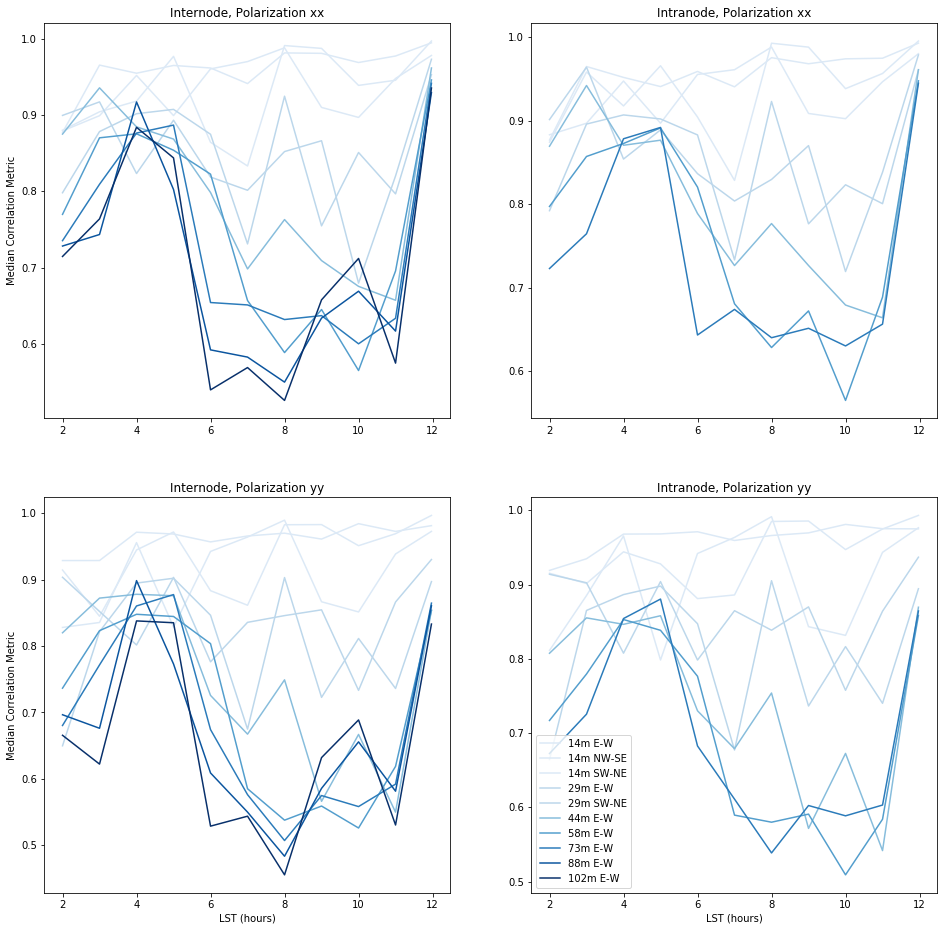

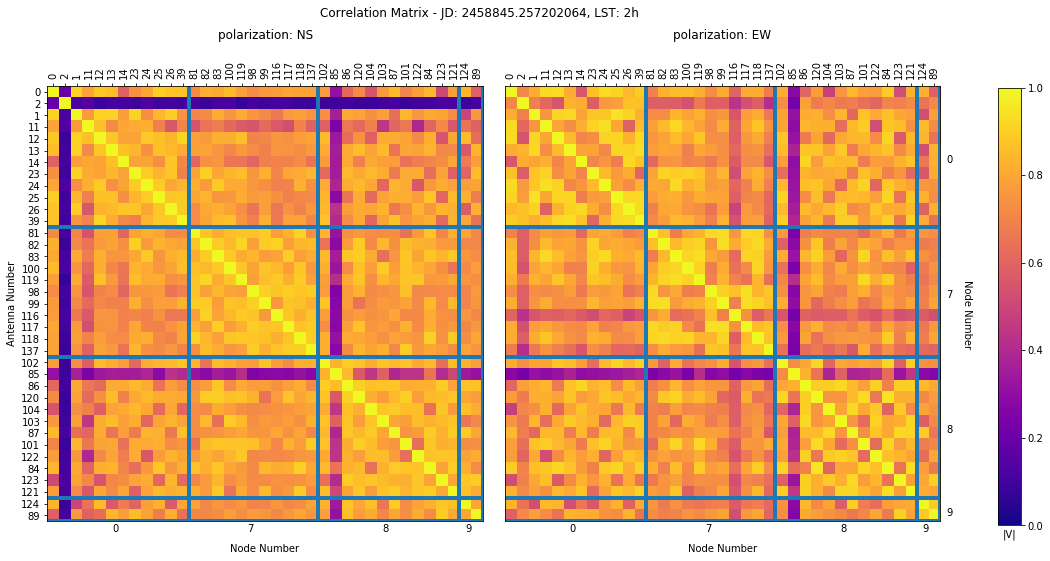

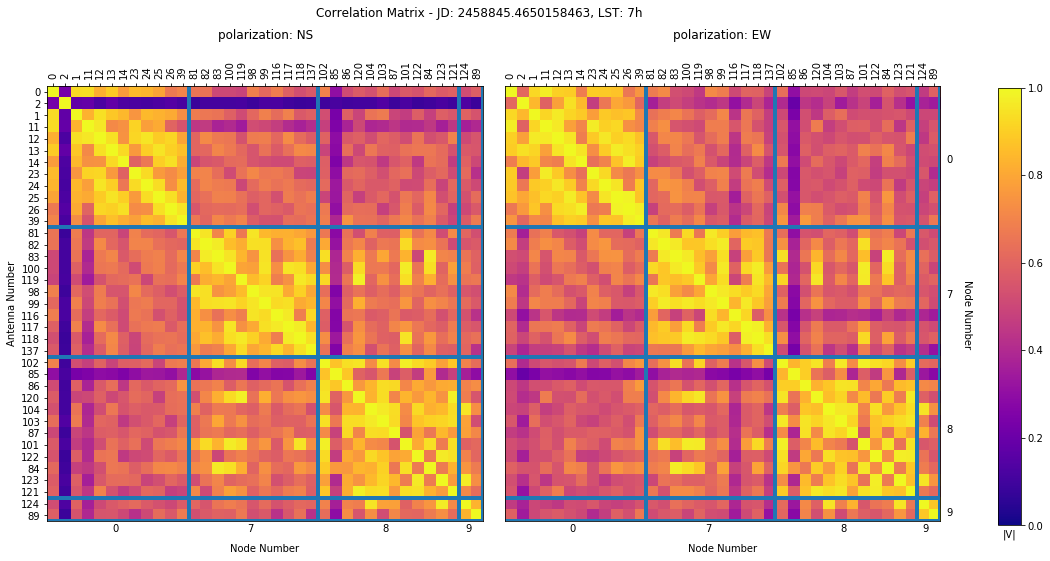

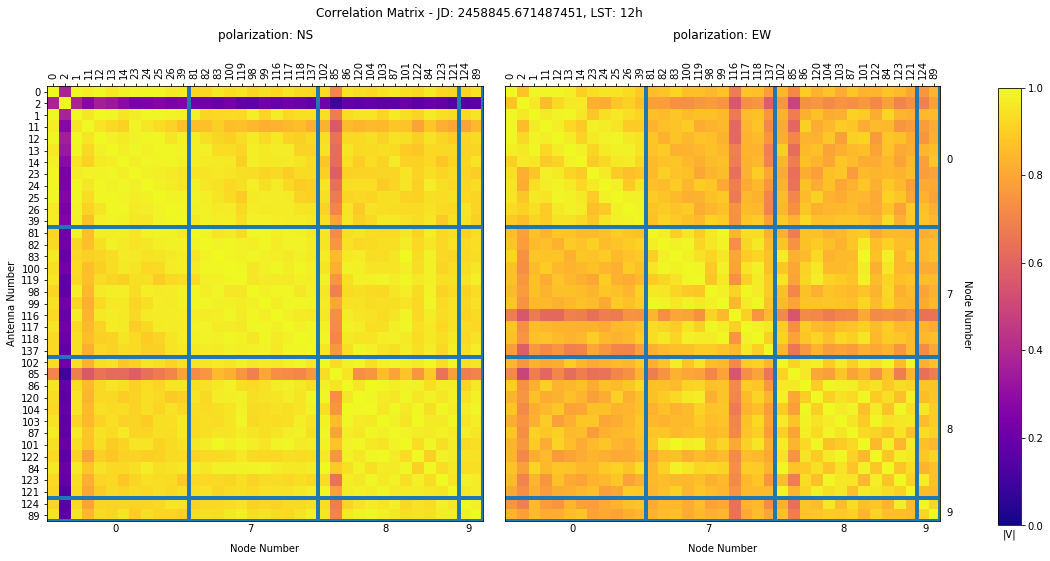

In [8]:
badAnts = []
badAnts = utils.plotNodeAveragedSummary(uvd1,HHfiles)

Visibility amplitude spectra for a set of redundant baselines, labeled by inter vs. intranode baselines. The red and blue should exhibit the same bandpass shape - if the red are consistently different from the blue, this indicates an issue with internode correlations.

Note: antennas that were identified as bad by the correlation matrix have been removed from this plot.

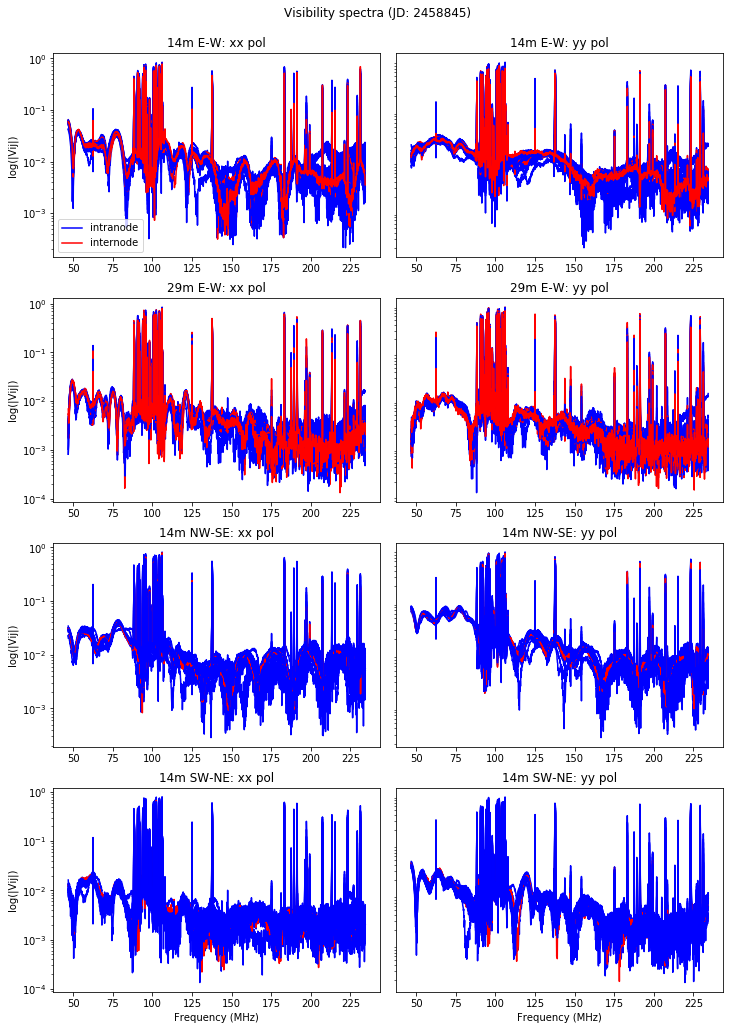

In [9]:
utils.plotVisibilitySpectra(HHfiles[len(HHfiles)//2], badAnts=badAnts)

## Antenna Positions

Antennas outlined in black here have been identified by the correlation matrix as bad antennas. 

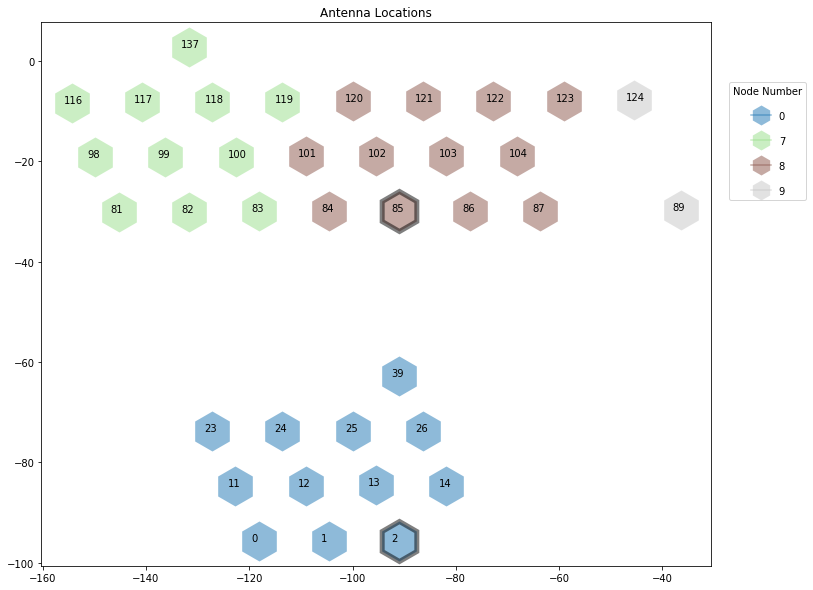

In [10]:
utils.plot_antenna_positions(uvd1, badAnts=badAnts)

## Single File Antenna Metrics

In [11]:
antmetfiles = sorted(glob.glob("{0}/zen.*.*.hdf5".format(data_path)))
ant_metrics = hera_qm.ant_metrics.load_antenna_metrics(antmetfiles[1])

Ant Metrics for /lustre/aoc/projects/hera/lberkhou/2458845/zen.2458845.25547.ant_metrics.hdf5


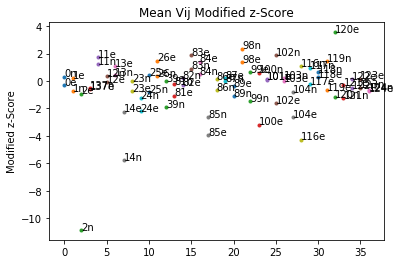

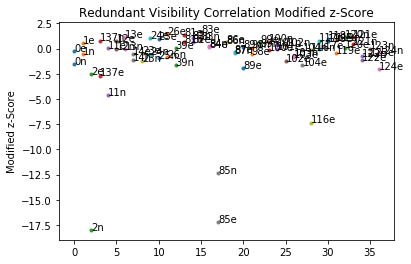

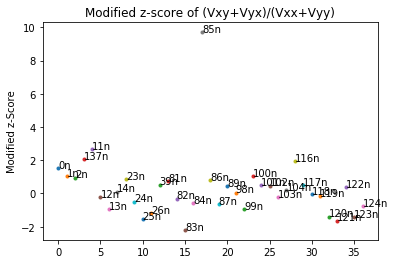

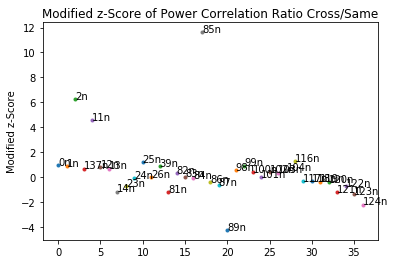

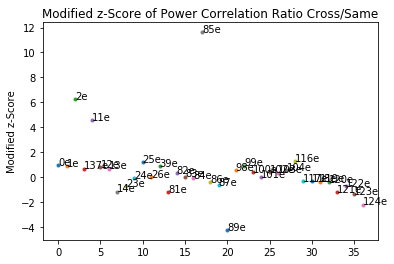

In [12]:
utils.show_metric(ant_metrics, antmetfiles, ants=None, antpols=None, title='', ylabel='Modified z-Score', xlabel='')

## Ant Metrics over a whole night

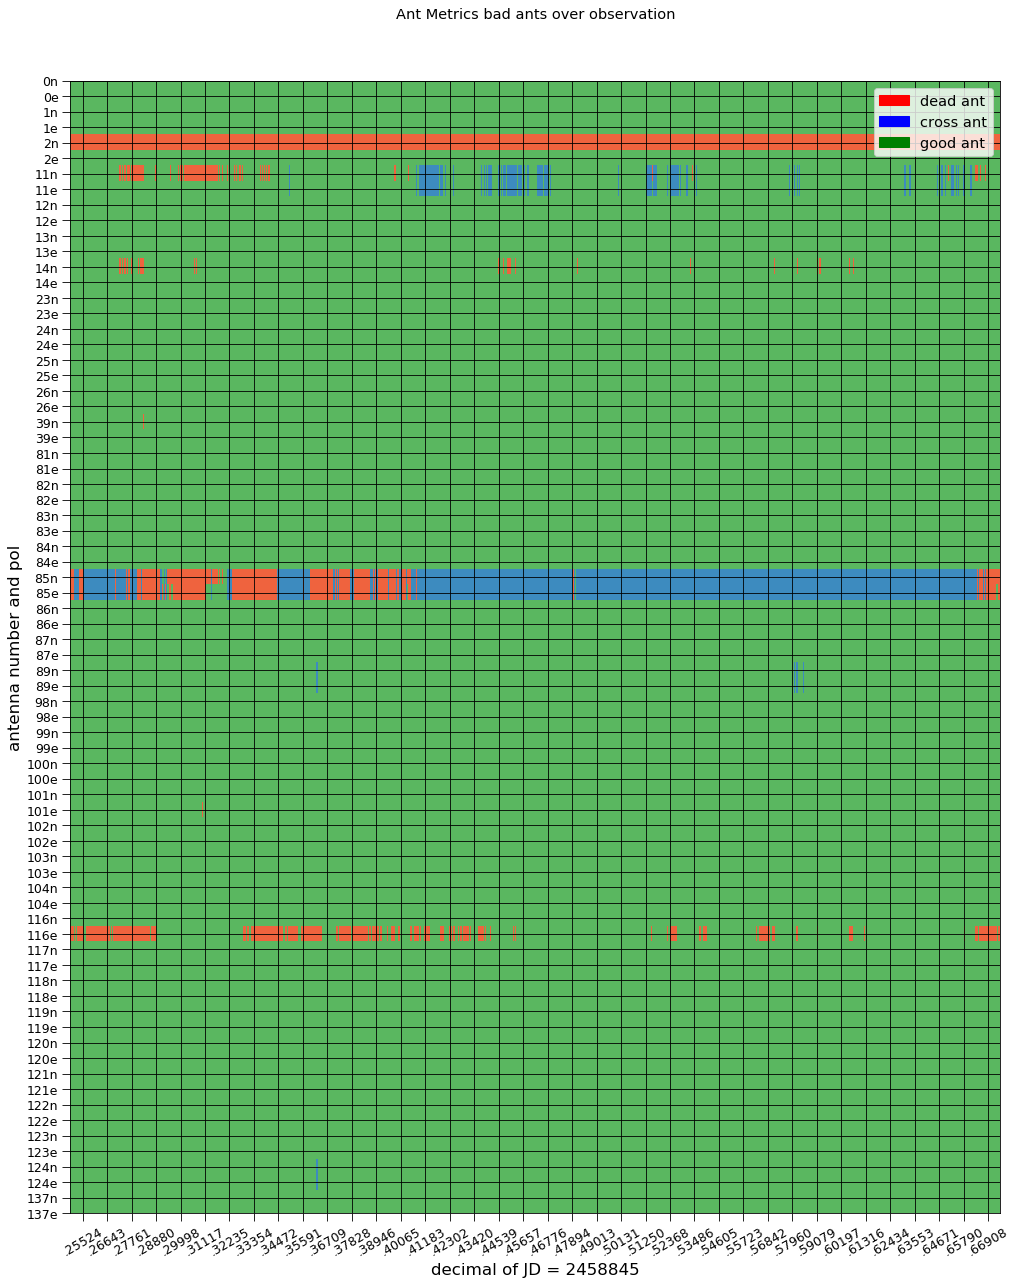

In [13]:
utils.all_ant_mets(antmetfiles, HHfiles)